In [13]:
import pandas as pd
import numpy
import json
from pprint import pprint
import hvplot.pandas

import plotly.express as px

%matplotlib inline

In [14]:
#Create dataframes from all csv files
axie_holders_df = pd.read_csv("../Resources/Axie_csv/holders.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True)
axie_holders_df = axie_holders_df.drop(["Date Raw"], axis = 1)
axie_holders_df.head()

,Holders Count
Date Parsed,
2018-03-14,91
2018-03-15,95
2018-03-16,104
2018-03-17,109
2018-03-18,111


In [72]:
#daily AXS token price since token launch
AXS_price_df = pd.read_csv("../Resources/axs-usd-max.csv", parse_dates=True)
#convert datetime (snapped_at) to date
AXS_price_df['Date'] = pd.to_datetime(AXS_price_df['snapped_at']).dt.date
AXS_price_df = (
    AXS_price_df.drop(["snapped_at", "market_cap", "total_volume"], 
    axis = 1)).set_index(["Date"]
    )
#AXS_price_df = AXS_price_df.set_index(["Date"])
AXS_price_df

,price
Date,
2020-11-04,0.145700
2020-11-05,0.145700
2020-11-06,0.134893
2020-11-07,0.142960
2020-11-08,0.141995
...,...
2021-04-02,5.550468
2021-04-03,5.666851
2021-04-04,5.085394


[datetime.date(2020, 11, 4),
 datetime.date(2020, 11, 5),
 datetime.date(2020, 11, 6),
 datetime.date(2020, 11, 7),
 datetime.date(2020, 11, 8),
 datetime.date(2020, 11, 9),
 datetime.date(2020, 11, 10),
 datetime.date(2020, 11, 11),
 datetime.date(2020, 11, 12),
 datetime.date(2020, 11, 13),
 datetime.date(2020, 11, 14),
 datetime.date(2020, 11, 15),
 datetime.date(2020, 11, 16),
 datetime.date(2020, 11, 17),
 datetime.date(2020, 11, 18),
 datetime.date(2020, 11, 19),
 datetime.date(2020, 11, 20),
 datetime.date(2020, 11, 21),
 datetime.date(2020, 11, 22),
 datetime.date(2020, 11, 23),
 datetime.date(2020, 11, 24),
 datetime.date(2020, 11, 25),
 datetime.date(2020, 11, 26),
 datetime.date(2020, 11, 27),
 datetime.date(2020, 11, 28),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 11, 30),
 datetime.date(2020, 12, 1),
 datetime.date(2020, 12, 2),
 datetime.date(2020, 12, 3),
 datetime.date(2020, 12, 4),
 datetime.date(2020, 12, 5),
 datetime.date(2020, 12, 6),
 datetime.date(2020, 1

In [16]:
#total transaction volume inc land and slp etc
total_volume_df = pd.read_csv("../Resources/Axie_csv/totalVolume.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True).round(1)
total_volume_df = total_volume_df.drop(["Date Raw"], axis = 1)
total_volume_df.tail()



,Sales Count,Volume,Volume USD,Cummulative Volume,Cummulative Volume USD
Date Parsed,,,,,
2021-04-02,412,80.8,162782.9,35097.5,25268806.9
2021-04-03,505,85.7,182811.6,35183.3,25451618.5
2021-04-04,592,119.6,242877.4,35302.9,25694495.9
2021-04-05,476,88.6,184220.2,35391.5,25878716.1
2021-04-06,495,75.3,157967.4,35466.8,26036683.5


In [17]:
#Average price for one Axie
axieAverage_df = pd.read_csv("../Resources/Axie_csv/axieAverage.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True).round(1)
axieAverage_df = axieAverage_df.drop(["Meo", "Meo USD", "Meo2", "Meo2 USD", "Date Raw", "Mystic4", "Mystic4 USD"], axis = 1)
axieAverage_df.tail()

,Normal,Normal USD,Origin,Origin USD,Mystic1,Mystic1 USD,Mystic2,Mystic2 USD,Mystic3,Mystic3 USD
Date Parsed,,,,,,,,,,
2021-04-02,0.2,276.6,2.4,4120.4,10.6,18437.1,17.5,25629.5,138.6,57842.9
2021-04-03,0.2,284.9,2.4,4176.9,10.3,18845.1,17.5,25629.5,138.6,57842.9
2021-04-04,0.2,288.8,2.4,4370.3,10.4,19044.9,17.5,25629.5,138.6,57842.9
2021-04-05,0.1,293.8,2.5,4451.2,10.4,19044.9,17.5,25629.5,138.6,57842.9
2021-04-06,0.1,296.9,2.4,4344.5,10.4,19044.9,17.5,25629.5,138.6,57842.9


In [18]:
#Axie only sales volume
axie_volume_df = pd.read_csv("../Resources/Axie_csv/axieVolume.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True).round(1)
axie_volume_df = axie_volume_df.drop(["Date Raw"], axis = 1)
axie_volume_df.tail()

,Sales Count,Volume,Volume USD,Cummulative Volume,Cummulative Volume USD
Date Parsed,,,,,
2021-04-02,383,58.6,115509.0,24252.9,14915349.7
2021-04-03,491,84.1,179414.2,24337.0,15094763.9
2021-04-04,571,95.2,191902.2,24432.2,15286666.1
2021-04-05,469,82.1,170646.9,24514.4,15457313.1
2021-04-06,495,75.3,157967.4,24589.6,15615280.5


In [19]:
#Revenue to founders/ dev team
revenue_df = pd.read_csv("../Resources/Axie_csv/revenue.csv", delimiter = ';', index_col = 'Date Parsed', parse_dates=True).round(1)
revenue_df = revenue_df.drop(["Date Raw", "Axie Presale ETH", "Land Presale ETH", "Marketplace Fee ETH", "Breeding Fee ETH"], axis = 1)
revenue_df.tail()

,Axie Presale USD,Land Presale USD,Marketplace Fee USD,Breeding Fee USD
Date Parsed,,,,
2021-04-02,501703.5,579422.5,1098745.2,437567.9
2021-04-03,501703.5,579422.5,1107945.3,455358.9
2021-04-04,501703.5,579422.5,1115846.9,472740.9
2021-04-05,501703.5,579422.5,1126121.3,477895.7
2021-04-06,501703.5,579422.5,1129867.2,478630.0


In [20]:
#Join Axie holders table with sales volume and drop nulls

df_holders_and_vol = axie_holders_df.join(total_volume_df, how='left').dropna()

df_holders_and_vol

,Holders Count,Sales Count,Volume,Volume USD,Cummulative Volume,Cummulative Volume USD
Date Parsed,,,,,,
2018-03-25,120,10.0,3.8,1971.0,3.8,1971.0
2018-03-26,111,12.0,6.8,3535.8,10.6,5506.8
2018-03-27,114,13.0,3.8,1861.2,14.4,7368.0
2018-03-28,112,5.0,3.4,1535.2,17.8,8903.2
2018-03-29,113,3.0,1.4,642.1,19.3,9545.4
...,...,...,...,...,...,...
2021-04-02,38009,412.0,80.8,162782.9,35097.5,25268806.9
2021-04-03,38305,505.0,85.7,182811.6,35183.3,25451618.5
2021-04-04,38761,592.0,119.6,242877.4,35302.9,25694495.9


In [21]:
#Visualize AXS price
fig_AXS = px.line(AXS_price_df, labels={"value":"$AXS (USD)"})
fig_AXS.show()

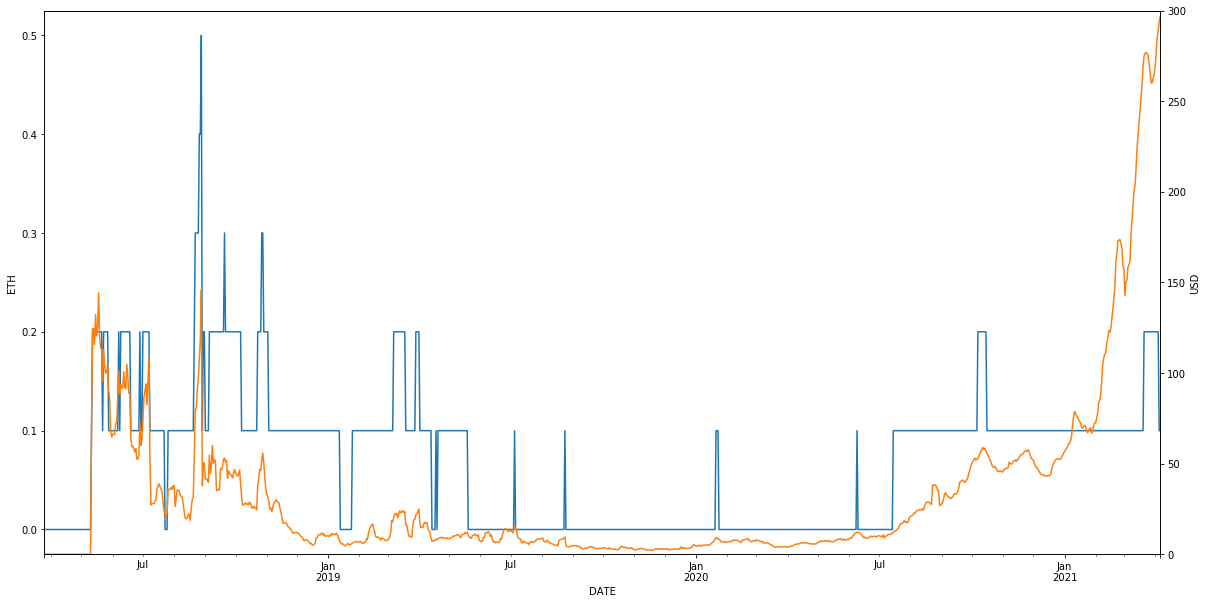

In [32]:
#Average axie price in ETH and USD - shows that the price is consistant in ETH but tends to ignore the USD value

ax = axieAverage_df['Normal'].plot(figsize=[20,10])
ax2 = axieAverage_df['Normal USD'].plot(secondary_y=True, figsize=[20,10])
ax2.set_ylim(0, 300)
ax2.set_ylabel("USD")
ax.set_ylabel("ETH")
ax.set_xlabel("DATE")

ax_av_fig = ax.get_figure()
ax_av_fig.savefig('AxieAverage price.png')

In [48]:
#Same as above but with plotly??

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[40, 50, 60], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=[2, 3, 4], y=[4, 5, 6], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

In [56]:
fig7 = go.scatter(axieAverage_df)

TypeError: 'module' object is not callable

In [23]:
#PLOTS

#total_volume_df.hvplot(xlabel = "Date", legend = True, title = "Total sales volume", frame_width = (600), frame_height = 400, )

# axie_holders_df.hvplot(xlabel = "Date", legend = True, title = "Holders of Axies (Unique Adresses)")

,Sales Count,Volume,Volume USD,Cummulative Volume,Cummulative Volume USD
Date Parsed,,,,,
2021-04-02,383,58.6,115509.0,24252.9,14915349.7
2021-04-03,491,84.1,179414.2,24337.0,15094763.9
2021-04-04,571,95.2,191902.2,24432.2,15286666.1
2021-04-05,469,82.1,170646.9,24514.4,15457313.1
2021-04-06,495,75.3,157967.4,24589.6,15615280.5


,Axie Presale USD,Land Presale USD,Marketplace Fee USD,Breeding Fee USD
Date Parsed,,,,
2021-04-02,501703.5,579422.5,1098745.2,437567.9
2021-04-03,501703.5,579422.5,1107945.3,455358.9
2021-04-04,501703.5,579422.5,1115846.9,472740.9
2021-04-05,501703.5,579422.5,1126121.3,477895.7
2021-04-06,501703.5,579422.5,1129867.2,478630.0


In [24]:
#Take final row and produce pie chart showing composition of total revenue

revenue_pie_data = pd.DataFrame(revenue_df.iloc[-1])

fig_pie = px.pie(revenue_pie_data, values="2021-04-06", names=revenue_pie_data.index, title='Revenue Composition')
fig_pie.show()


In [25]:
revenue_fig = px.line(revenue_df, x=revenue_df.index, y=["Axie Presale USD","Land Presale USD", "Marketplace Fee USD", "Breeding Fee USD"],
    labels={"Date Parsed": "Date"},
    title="Axie Infinity Revenue Streams")

#fig = px.line(revenue_df)
revenue_fig.show()

In [26]:
cum_sales_fig = px.line(df_holders_and_vol, y="Cummulative Volume USD",
    labels={"Date Parsed": "Date"},
    title= "Cumulative Sales Volume"
    )
cum_sales_fig.show()

In [27]:
#Holders with cum_vol
cum_sales_fig = px.line(df_holders_and_vol, y=["Cummulative Volume USD", "Holders Count"],
    labels={"Date Parsed": "Date"},
    title= "Cumulative Sales Volume"
    )
cum_sales_fig.show()

In [28]:
#Scale so different impossible to see trends concurrenlty
#New scaled df
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df_holders_and_vol)
scaled

array([[2.30526882e-02, 5.35618640e-01, 4.17307270e-01, 1.23759042e-01,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.42742367e-01, 7.46760378e-01, 2.22012797e-01,
        1.91749147e-02, 1.35810987e-02],
       [7.68422940e-03, 6.96304231e-01, 4.17307270e-01, 1.16864703e-01,
        2.98903082e-02, 2.07300157e-02],
       ...,
       [9.89984888e+01, 3.17086235e+01, 1.31341972e+01, 1.52502661e+01,
        9.95378282e+01, 9.86856486e+01],
       [9.94364898e+01, 2.54954472e+01, 9.72984845e+00, 1.15671819e+01,
        9.97876660e+01, 9.93932432e+01],
       [1.00000000e+02, 2.65131227e+01, 8.26927301e+00, 9.91876924e+00,
        1.00000000e+02, 1.00000000e+02]])

In [29]:
#convert array into df with columns set to solumns in original df
df_scaled = pd.DataFrame(scaled, columns=df_holders_and_vol.columns)
df_scaled

,Holders Count,Sales Count,Volume,Volume USD,Cummulative Volume,Cummulative Volume USD
0,0.023053,0.535619,0.417307,0.123759,0.000000,0.000000
1,0.000000,0.642742,0.746760,0.222013,0.019175,0.013581
2,0.007684,0.696304,0.417307,0.116865,0.029890,0.020730
3,0.002561,0.267809,0.373380,0.096395,0.039478,0.026627
4,0.005123,0.160686,0.153745,0.040317,0.043708,0.029093
...,...,...,...,...,...,...
1106,97.072309,22.067488,8.873270,10.221134,98.958633,97.050566
1107,97.830486,27.048741,9.411377,11.478736,99.200575,97.752750
1108,98.998489,31.708623,13.134197,15.250266,99.537828,98.685649
1109,99.436490,25.495447,9.729848,11.567182,99.787666,99.393243


In [30]:
#visualize the scaled data
fig_scale = px.line(df_scaled, y=["Cummulative Volume USD", "Holders Count"],
    labels= {"value":"Scaled Value", "index":"Days Since Launch"},
    title= "Scaled Volume/Holder numbers"
    )
fig_scale.show()
# This shows exponential growth in number of holders is correlated with the exponential increasein  the cumulative volume of revenue.

In [31]:
#axie holders are increasing exponentially

fig3 = px.line(axie_holders_df,
    labels={"Date Parsed": "Date", "value": "Holders"},
    title= "Unique Axie holders"
    )
fig3.show()